# Gradient Descent Variations

This notebook contains the implementation of five variations of gradient descent and the results of comparing all of these variations with each other after 250 iterations. These implementations are tested with two different loss functions: logistic loss and hinge loss. The results are shown graphically.

The five gradient descent variations implemented and compared are:
* Gradient Descent with Fixed Learning Rate
* Gradient Descent with Armijo Line Search
* Accelerated Gradient Descent
* Conjugate Gradient (Fletcher-Reeves)
* Barzelia-Borwein Step Gradient Descent (Approach 1)

In [1]:
# Import data
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import numpy.linalg as LA
X = loadmat(r"data\\train.mat")
y = np.loadtxt(r"data\\train.targets")
X = np.array(X['X'].todense())

# Number of examples = 12678
n = X.shape[0]

# Number of features = 4932
m = X.shape[1]

# Set w initially
w = np.random.rand(m, 1)

In [2]:
# Define loss functions

# Vectorized version of logistic loss function:
def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    Xw = np.matmul(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    f = np.sum(np.logaddexp(0,-yXw)) + 0.5*lam*np.sum(w*w)
    num = np.exp(-yXw)
    num[np.isinf(num)] = 0
    den = (1 + np.exp(-yXw))
    den[np.isinf(den)] = 0
    gMul = np.zeros(yXw.shape)
    gMul[den != 0] = (num[den != 0]) / (den[den != 0])
    ymul = -1*yT*gMul
    g =  np.matmul(ymul.reshape(1,-1),X) + lam*w.reshape(1,-1)
    g = g.reshape(-1,1)
    return [f, g]


# Vectorized version of hinge loss function:
def HingeLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    Xw = np.matmul(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    f = np.sum(np.maximum(0, 1 - yXw.T)) + 0.5*np.sum(w*w)
    ymul = -1*yT*np.double(1 > yXw)    
    g = np.matmul(ymul.reshape(1,-1),X).reshape(-1,1)  + 1*w.reshape(-1,1)
    return [f, g]


# Define function objects
logisticFunObj = lambda w, X, y, lam: LogisticLoss(w, X, y, lam)
hingeFunObj = lambda w, X, y, lam: HingeLoss(w, X, y, lam)

In [3]:
# Gradient descent with fixed learning rate
def gd_fixed_learning_rate(funObj, w, maxEvals, X, y, lam, verbosity):
    alpha = 1e-05
    funEvals = 1
    funVals = []
    
    while(1):
        [f, g] = funObj(w, X, y, lam)
        optCond = LA.norm(g, np.inf)
        if (verbosity > 0):
            print(funEvals, alpha, f, optCond)
        w = w - (alpha * g)
        funEvals = funEvals + 1
        if ((optCond < 1e-2) or (funEvals > maxEvals)):
            break
        funVals.append(f)
    
    return funVals

print("Gradient descent with fixed learning rate and logistic loss:")
gd1_with_logistic_loss = gd_fixed_learning_rate(logisticFunObj, w, 250, X, y, 1, 1)

print("\nGradient descent with fixed learning rate and hinge loss:")
gd1_with_hinge_loss = gd_fixed_learning_rate(hingeFunObj, w, 250, X, y, 1, 1)

Gradient descent with fixed learning rate and logistic loss:
1 1e-05 2930961.1270002797 12225.767331944291
2 1e-05 2714404.9525740254 12225.645074270971
3 1e-05 2497853.109249604 12225.522817820229
4 1e-05 2281305.596940394 12225.40056259205
5 1e-05 2064762.4155597761 12225.278308586425
6 1e-05 1848223.5650211312 12225.156055803338
7 1e-05 1631689.0452378432 12225.03380424278
8 1e-05 1415158.8561232972 12224.911553904738
9 1e-05 1198632.9975908808 12224.789304789025
10 1e-05 982111.4696409855 12224.666969895574
11 1e-05 765613.2636678464 12216.347584738258
12 1e-05 551163.3315909572 11818.469153773342
13 1e-05 360998.75857932516 9679.497208486611
14 1e-05 237957.90186875116 6859.3595280723075
15 1e-05 172505.42275442596 4978.289974929771
16 1e-05 134840.06408011203 3935.5079403953278
17 1e-05 109322.31736967432 3343.9192749336876
18 1e-05 89781.7281320798 2948.6925103487915
19 1e-05 73996.28945483943 2604.5907145334713
20 1e-05 61286.06322042591 2288.8024437482154
21 1e-05 51121.338298

178 1e-05 9054.634424518654 69.48266071242712
179 1e-05 9045.744482115977 69.19614943022411
180 1e-05 9036.907291363786 68.91233560469084
181 1e-05 9028.121955272238 68.63111423356325
182 1e-05 9019.387606235496 68.35238352063453
183 1e-05 9010.703405211707 68.07604624066984
184 1e-05 9002.068540709102 67.80201090030396
185 1e-05 8993.482227613636 67.53019268657512
186 1e-05 8984.943705893695 67.26051420020336
187 1e-05 8976.452239216655 66.99290597579817
188 1e-05 8968.00711351058 66.72730679582048
189 1e-05 8959.607635502198 66.46366380925835
190 1e-05 8951.253131259706 66.20193246956255
191 1e-05 8942.942944765718 65.94207630938732
192 1e-05 8934.676436542426 65.68406657204618
193 1e-05 8926.45298234735 65.42788172131223
194 1e-05 8918.271971954253 65.17350685223877
195 1e-05 8910.132808030403 64.92093302607344
196 1e-05 8902.034905117356 64.6701565520895
197 1e-05 8893.977688719524 64.42117823832652
198 1e-05 8885.960594501286 64.17400263186406
199 1e-05 8877.983067590929 63.928637

106 1e-05 10354.588607683892 101.46621961859826
107 1e-05 10337.11877241656 100.46520495640208
108 1e-05 10319.890473886513 98.46420030435252
109 1e-05 10303.134833734157 97.46321566234947
110 1e-05 10286.642863497747 97.46224103019284
111 1e-05 10270.159759577284 96.46126640778255
112 1e-05 10254.158288664677 92.46030179511847
113 1e-05 10239.143007500166 92.45937719210052
114 1e-05 10224.182879441032 92.45845259832859
115 1e-05 10209.225578942114 92.45752801380262
116 1e-05 10194.437117127787 90.45660343852248
117 1e-05 10179.863005077583 89.45569887248809
118 1e-05 10165.599195797233 88.45480431549936
119 1e-05 10151.557708564244 89.45391976745621
120 1e-05 10137.556703932658 89.45302522825854
121 1e-05 10123.644657319124 88.45213069800624
122 1e-05 10110.018132558942 88.45124617669927
123 1e-05 10096.391880327892 88.4503616642375
124 1e-05 10082.885763700553 87.44947716062086
125 1e-05 10069.680100936588 87.44860266584925
126 1e-05 10056.660981607441 86.44772817982259
127 1e-05 100

In [4]:
# Gradient descent with Armijo line search
def gd_armijo_line_search(funObj, w, maxEvals, X, y, lam, verbosity):
    gamma = 1e-04
    [f, g] = funObj(w, X, y, lam)
    gTg = float(np.dot(g.T, g))
    
    if gTg == 0: alpha = 1
    else: alpha = 1 / np.sqrt(gTg)
    if alpha <= 0: alpha = 1
    
    funEvals = 1
    funVals = []
    
    while(1):
        wp = w - (alpha * g)
        [fp, gp] = funObj(wp, X, y, lam)
        
        gpTgp = float(np.dot(gp.T, gp))
        if gpTgp == 0: alpha = 1
        else: alpha = min(1, (2 * (f - fp)) / (gpTgp))
        if alpha <= 0: alpha = 1
            
        while (fp > f - gamma * alpha * gTg):
            alpha = (np.square(alpha) * gTg) / (2 * (fp + (alpha * gTg) - f))
            if alpha <= 0:
                break
            wp = w - (alpha * g)
            [fp, gp] = funObj(wp, X, y, lam)
        
        f = fp
        g = gp
        w = wp
        gTg = float(np.dot(gp.T, gp))
        
        optCond = LA.norm(g, np.inf)
        if (verbosity > 0):
            print(funEvals, alpha, f, optCond)
        funEvals = funEvals + 1
        if ((optCond < 1e-2) or (funEvals > maxEvals)):
            break
        funVals.append(f)
    
    return funVals

print("Gradient descent with Armijo line search and logistic loss:")
gd2_with_logistic_loss = gd_armijo_line_search(logisticFunObj, w, 250, X, y, 1, 1)

print("\nGradient descent with Armijo line search and hinge loss:")
gd2_with_hinge_loss = gd_armijo_line_search(hingeFunObj, w, 250, X, y, 1, 1)

Gradient descent with Armijo line search and logistic loss:
1 1.3590894815535293e-05 2783802.781798048 12225.6842532322
2 2.718234377837801e-05 2489488.0914071756 12225.518095243468
3 5.4366904276536464e-05 1900866.7107885252 12225.185777007733
4 0.00010906705876847742 723714.4111893942 12202.455928665764
5 0.029532826711744037 30258.52462632486 413.35994703876844
6 0.0003304465054495827 17144.51851518634 280.50822277787125
7 0.006161453453142672 13148.027863718584 97.60938397802464
8 0.0001349710515456597 11481.649952200574 302.73258144218727
9 0.0026511906450653053 9355.075711696183 97.66080177661593
10 0.0002560654933795817 9093.460846398797 94.17240746037625
11 0.00033167175193398065 8866.923875745277 90.38333405050697
12 0.00019166146507418002 8650.213679438024 110.22025416446857
13 0.00032616990882918103 8454.347097822416 84.37282288665759
14 0.00017336590266381973 8277.953889576876 102.54983352345072
15 0.00039328825378898683 8102.9690251428265 76.63349176192114
16 0.00017059076

134 5.094833666685994e-05 2981.480435292121 37.735344743521395
135 0.00022627307067747272 2969.4647967745277 26.561220771952375
136 0.00045587836270063944 2945.5098148368957 25.549951700047554
137 0.0008557399588028791 2898.152461492732 29.75737127122727
138 2.5598086836650488e-05 2866.2736554124567 97.23946368180415
139 0.00016590501190543304 2819.858496224766 47.27212006528138
140 0.00010773369588763284 2813.448516231071 59.172484313276506
141 2.251856210874715e-05 2804.4560019386845 56.40879428384905
142 9.828293720560404e-05 2790.263558166609 33.39556919258477
143 7.300564608344911e-05 2780.5389333010144 43.344713188424336
144 0.0001706171401229246 2769.7907003189785 23.71251317720321
145 9.96283484482581e-05 2756.949507492057 42.62488800217054
146 8.005238269562439e-05 2746.9859356952193 31.481423541924094
147 0.00013084651721302984 2737.106427056836 34.67583577297571
148 8.299599822656072e-05 2726.9777065706785 31.200785845562717
149 0.00012108165908290196 2717.2681338987704 35.4

13 0.00016325040234709042 9611.318261673874 81.95402537065931
14 0.0003628220014104688 9453.251862802026 68.0193857813627
15 0.0007573428860477981 9159.605332464705 62.919987023775796
16 0.00047453137305825935 8712.31546950511 101.95911574476277
17 0.0001522958355275767 8539.716670536418 53.872354462058034
18 0.00031337768007832096 8446.81763800262 60.656369228253816
19 0.0006522248772284565 8264.830702054282 57.63736087598309
20 0.0013230131216749365 7919.075015096358 69.59976835536199
21 8.49104440851446e-05 7659.6718956116265 159.5706605588629
22 0.0009481787890658067 7296.478667938101 63.01560968541924
23 0.00035912410628799365 7270.55175371675 121.54324751494023
24 0.00013658800987189655 7102.565175610218 67.00035597239064
25 0.00021538688185824339 7041.888453454154 70.47782440730941
26 0.0001817476025170915 6967.327348764677 63.98969871336413
27 0.00013741302451447597 6907.2987027859235 81.45692614828009
28 0.0003342317060843449 6837.108003019941 46.68801773004483
29 0.0004373759

149 4.443535166133122e-05 4118.457139509059 52.04675684746386
150 3.312245458111214e-05 4111.811406784893 42.47658902217925
151 2.718739368311959e-05 4106.043355349757 62.04394582260307
152 4.0871803265020264e-05 4100.407096604837 36.89470552015994
153 3.505954217019403e-05 4093.744635580568 60.04131723074532
154 1.981639688281511e-05 4088.584761214971 45.502121059734485
155 5.467520235131669e-05 4082.9449077542076 47.03905290143214
156 4.6261799406195025e-05 4074.524981535793 39.472201412432284
157 1.209354600649709e-05 4070.5223380164657 73.03569289342828
158 4.944982332993644e-05 4063.93681146934 53.034809632916144
159 1.870098934137192e-05 4057.996788233419 50.49999857859922
160 6.249065068291417e-05 4051.711715320106 45.032149067040706
161 3.300980665984006e-05 4042.8817774950376 47.468539917047416
162 1.1533700312631622e-05 4039.5370731789853 69.02913595156193
163 4.458183449885866e-05 4034.000655741593 51.02833979019502
164 2.5202828028187717e-05 4027.771265901198 46.46682767502

In [5]:
# Accelerated gradient descent
def gd_accelerated(funObj, w, maxEvals, X, y, verbosity):
    gamma_ls = 1e-04
    # lam = [previous_lambda, current_lambda]
    lam = [0, 1]
    gamma = 1
    [f, g] = funObj(w, X, y, lam[1])
    gTg = float(np.dot(g.T, g))
    
    if gTg == 0: alpha = 1
    else: alpha = 1 / np.sqrt(gTg)
    if alpha <= 0: alpha = 1
        
    y_0 = w
    funEvals = 1
    funVals = []
    
    while(1):
        y_1 = w - (alpha * g)
        wp = y_1 + (gamma * (y_1 - y_0))
        [fp, gp] = funObj(wp, X, y, lam[1])
        
        gpTgp = float(np.dot(gp.T, gp))
        alpha = min(1, (2 * (f - fp)) / (gpTgp))
        if alpha <= 0: alpha = 1
            
        while (fp > f - gamma_ls * alpha * gTg):
            alpha = (np.square(alpha) * gTg) / (2 * (fp + (alpha * gTg) - f))
            if alpha <= 0:
                break
            y_1 = w - (alpha * g)
            wp = y_1 + (gamma * (y_1 - y_0))
            [fp, gp] = funObj(wp, X, y, lam[1])
        
        f = fp
        g = gp
        w = wp
        y_0 = y_1
        gTg = float(np.dot(gp.T, gp))
        lam[0] = lam[1]
        lam[1] = (1 + np.sqrt(1 + 4 * (lam[0] ** 2))) / 2
        gamma = (lam[0] - 1) / lam[1]
        
        optCond = LA.norm(g, np.inf)
        if (verbosity > 0):
            print(funEvals, alpha, f, optCond)
        funEvals = funEvals + 1
        if ((optCond < 1e-2) or (funEvals > maxEvals)):
            break
        funVals.append(f)
    
    return funVals

print("Accelerated gradient descent with logistic loss:")
gd3_with_logistic_loss = gd_accelerated(logisticFunObj, w, 250, X, y, 1)

print("\nAccelerated gradient descent with hinge loss:")
gd3_with_hinge_loss = gd_accelerated(hingeFunObj, w, 250, X, y, 1)

Accelerated gradient descent with logistic loss:
1 2.7182066701586063e-05 2636645.436595818 12225.601174520112
2 5.4318785951073094e-05 2048468.2386720013 12225.4350204332
3 0.00014850420766475146 543355.2712384127 11774.059969112473
4 0.013867797450792052 131675.45441344107 462.57527206514555
5 0.0 165231.3053020063 466.1413523924565
6 0.000304488275480934 156594.39962312602 468.6031908391579
7 0.0007890318498167509 132998.7984656188 470.3987862512532
8 0.0036019133081390533 50848.90394165602 420.4691676479316
9 0.0001626503155485815 29960.147068866027 115.25758881264699
10 0.002114259868421764 25627.569056344884 204.58764327366316
11 0.00012216880099682955 25332.932473937988 332.81831222044167
12 0.00013301553625616054 23953.72106749753 296.54177698319927
13 0.004163644573372626 21842.116810079606 73.62761202874408
14 0.00027203958779548347 18925.46726499717 310.4227802074449
15 3.61038371858445e-05 17610.58561845316 518.6536050100635
16 6.199607335331133e-06 17359.461749822665 544.4

143 2.3864901346806732e-05 1530.1579806995087 104.16822407600051
144 2.0621725051832112e-05 1519.7258169364745 85.14700839701045
145 4.892145532492776e-05 1492.5765797603353 102.71622110107812
146 0.0 1529.4260311323615 116.37919139796908
147 0.0 1590.3320996282373 130.03429155174783
148 0.0 1673.2979650359466 143.87715725906708
149 0.0 1775.63269555449 158.5183624018963
150 0.0 1893.2456149868897 168.5926427905056
151 0.0 2021.6546145283749 174.68317524093004
152 0.0 2157.6737037498647 178.05383384269106
153 0.0 2299.3430319930203 179.56135661036598
154 0.0 2445.4622781427674 179.83854291656368
155 0.0 2595.344183872007 179.3154218063492
156 0.0 2748.5710413214597 178.23863859087027
157 0.0 2904.8487549489146 176.75204499349786
158 0.0 3063.9502673897896 174.94480074027794
159 0.0 3225.6944519110307 172.87248777643148
160 0.0 3389.935420122377 170.5676542031706
161 0.0 3556.555793132358 168.0470592903206
162 0.0 3725.461639752727 165.5647718298849
163 0.0 3896.5775926114943 163.287337

40 5.31194561031378e-05 3508.571909683156 51.96612146476055
41 0.0008879614799264549 3347.4109759530884 60.55445560162718
42 0.000201337941040534 3159.85714504905 51.60027187899618
43 9.93276573250225e-05 3057.825557899422 96.79304295456988
44 0.00037388123533183123 2884.5355177966517 77.29740631764433
45 2.8594740184487003e-05 2807.187011964399 80.28095825407866
46 0.0002499957680697291 2722.0710600428724 69.26315366642933
47 3.102954489247365e-05 2656.7780886324085 46.24441801511389
48 0.00026955896111084367 2619.514927721947 40.483330742603705
49 0.0013709078651902933 2483.3894119460447 36.191635060206146
50 0.00087565430420702 2402.3279399696917 137.0824459802281
51 5.4085591120413877e-05 2130.787957170163 50.979272093110595
52 0.00043992612172259635 2071.8742061043977 38.581806955826316
53 0.00024367124720473115 1928.5848923629344 68.00306252540918
54 4.880645604185195e-05 1825.787309657673 34.2716131010554
55 0.000244192412787497 1796.3290775828043 37.26968519437422
56 0.00071476

173 3.0987951528597045e-05 309.48353514800317 4.62755261103192
174 0.0013134924086035831 305.6649959952054 5.588554650141069
175 0.0006243867317047977 301.3349837933901 16.4608370505656
176 5.380420953162187e-05 293.47931596990657 3.94260813908285
177 0.004183398532315261 288.87392162192924 3.28720107777598
178 0.00018353614410598118 284.16301110606554 4.321266653296571
179 0.0013072763255168368 279.70493093469383 5.489199845248471
180 3.19068838810293e-05 275.63543355536854 5.33228629677993
181 0.0013518102275961702 271.9950153507519 5.845170894396333
182 8.014179607739723e-05 268.3388617096177 6.095049908569622
183 0.00025673942658990795 264.8471163895321 11.009897382864446
184 3.107487016069325e-05 261.3301015423937 6.098577392914879
185 0.0009434941115391131 258.00946508657836 5.708352484786073
186 0.00022835896289777284 251.39370184660305 15.97788192582243
187 2.0149471142598896e-05 247.90829359130575 7.251511161337679
188 0.00021165581044350806 245.73252847184955 9.9212324922927


In [6]:
# Conjugate gradient (Fletcher-Reeves)
def gd_conjugate(funObj, w, maxEvals, X, y, lam, verbosity):
    gamma = 1e-04
    [f, g] = funObj(w, X, y, lam)
    
    d = -g
    gTg = float(np.dot(g.T, g))
    dTd = gTg
    if gTg == 0: alpha = 1
    else: alpha = 1 / np.sqrt(gTg)
    if alpha <= 0: alpha = 1
    
    funEvals = 1
    funVals = []
    
    while(1):
        wp = w + (alpha * d)
        [fp, gp] = funObj(wp, X, y, lam)
        
        gpTgp = float(np.dot(gp.T, gp))
        
        if gpTgp == 0: alpha = 1
        else: alpha = min(1, (2 * (f - fp)) / (gpTgp))
        if alpha <= 0: alpha = 1
            
        while (fp > f - gamma * alpha * gTg):
            alpha = (np.square(alpha) * gTg) / (2 * (fp + (alpha * gTg) - f))
            if alpha <= 0:
                break
            wp = w + (alpha * d)
            [fp, gp] = funObj(wp, X, y, lam)
                
        f = fp
        g = gp
        w = wp
        gpTgp = float(np.dot(gp.T, gp))
        beta = gpTgp / gTg
        d = -g + beta * d
        gTg = gpTgp
        dTd = float(np.dot(d.T, d))
        
        optCond = LA.norm(g, np.inf)
        if (verbosity > 0):
            print(funEvals, alpha, f, optCond)
        funEvals = funEvals + 1
        if ((optCond < 1e-2) or (funEvals > maxEvals)):
            break
        funVals.append(f)
    
    return funVals


print("Conjugate gradient descent with logistic loss:")
gd4_with_logistic_loss = gd_conjugate(logisticFunObj, w, 250, X, y, 1, 1)

print("\nConjugate gradient descent with hinge loss:")
gd4_with_hinge_loss = gd_conjugate(hingeFunObj, w, 250, X, y, 1, 1)

Conjugate gradient descent with logistic loss:
1 1.3590894815535293e-05 2783802.781798048 12225.6842532322
2 5.436561116593728e-05 2195179.400982327 12225.351938383841
3 0.14486770617198888 20216.055436493716 338.2425103334274
4 0.00025751340187750665 14395.911942649996 230.2852894618363
5 0.0003402931210164715 13128.241896756725 154.26233538843744
6 6.238643447808336e-05 13117.945272654924 173.6448706945165
7 0.0001746277325118606 12593.851045086278 138.43568311996947
8 0.0011803431450196009 11602.599561558902 117.01232426139777
9 0.0009955883988829238 9897.198287358045 127.45001825326605
10 0.00013697744557666935 9315.519022854976 77.08167733128381
11 0.0004859340720456363 9160.069470186847 56.25286578550121
12 0.00024316174941024289 8689.134329251996 130.25751226560064
13 0.00017793672662907956 7471.141237032542 232.35134744025842
14 4.239642748450095e-06 7381.455523410138 230.40791251937057
15 2.3143211231784236e-05 7241.645058228657 218.52021863452367
16 0.00047657231293294565 649

132 6.0541463400056746e-05 584.9840097747837 19.64846907939689
133 0.00012391448353121377 580.4126989654201 17.362383013368486
134 0.0014912365228873484 571.9517071028615 7.221813398604672
135 0.0001799498594276334 570.7745941206113 6.40760236170431
136 0.00017838913035000785 570.069747206172 7.641293923675374
137 0.0004880946718355335 567.9368541256359 7.738239319494197
138 0.0046559236359351615 559.3637164178012 5.51265314532179
139 0.009346061352222726 531.8139706896751 5.854879016749311
140 0.0008465558048047308 525.5795030469906 7.273224546810165
141 0.0021840210384322027 516.2070212388393 7.596763132417605
142 0.00013535155716354032 513.6467537337124 5.866482277343438
143 0.001204814956812679 511.5819778365623 4.333925130625719
144 0.00015091069186918302 507.3552738164514 14.598181390137368
145 2.349678557863055e-18 507.3552738164514 14.598181390137759
146 4.059086999078989e-18 507.3552738164513 14.598181390138008
147 1.2177260997236632e-17 507.35527381645096 14.598181390138206
1

12 4.9255160803676434e-05 10464.850137948355 92.7299887371487
13 0.00041798591298666414 10319.28705074645 66.78332664965119
14 6.907982578586908e-05 10215.925342641187 64.03325180548164
15 0.00015835718817424295 10091.040819474623 88.19118528233692
16 0.00017667177654876587 9567.542904085269 156.63283446912976
17 4.635679313848882e-06 9507.833569646024 159.63027532785017
18 2.8275177049342245e-05 9419.233394725752 161.6268776298409
19 0.00035920065514407376 8749.203767469173 126.60120451542363
20 2.5552583034312702e-05 8371.923757839619 86.03909581134549
21 0.0004649258952502696 8213.814867474131 56.848121468756226
22 7.320282568977277e-05 8044.235756595885 75.5719296926559
23 0.0001772470773379237 7892.883877474639 100.60906199693342
24 9.711994979563245e-05 7402.859357243005 203.93652371053693
25 1.0412180537349864e-06 7389.5870279372375 207.93392199244082
26 4.559385782049886e-06 7365.535490399834 207.93098662207373
27 2.7109206973746685e-05 7217.075088149746 210.91717899333406
28 0

147 4.499726927088022e-06 2604.781080956659 71.93679413976399
148 0.0001478231705943627 2554.295655003174 63.9315413703712
149 2.3795859065551343e-06 2535.3186310454403 60.92936267569259
150 6.14944016677316e-05 2518.781569981177 55.92731558460911
151 2.7240575551135594e-06 2506.447974589142 181.8438015797692
152 1.2834317419562568e-21 2506.447974589142 181.8438015797692
153 2.579749481257613e-21 2506.447974589142 181.8438015797692
154 2.5068580880991224e-22 2506.447974589142 181.8438015797692
155 1.4879976969400174e-21 2506.447974589142 181.8438015797692
156 2.148758093721039e-22 2506.447974589142 181.8438015797692
157 2.9651720988293008e-21 2506.447974589142 181.8438015797692
158 1.0060053609373787e-21 2506.447974589142 181.8438015797692
159 1.3509056331777324e-21 2506.447974589142 181.8438015797692
160 3.7305981625689202e-22 2506.447974589142 181.8438015797692
161 2.2307392210030694e-21 2506.447974589142 181.8438015797692
162 6.865468032129558e-22 2506.447974589142 181.8438015797692

In [7]:
# Barzelia-Borwein step gradient descent (approach 1)
def gd_barzerlia_borwein(funObj, w, maxEvals, X, y, lam, verbosity):
    gamma = 1e-04
    [f, g] = funObj(w, X, y, lam)
    gTg = float(np.dot(g.T, g))
    s = w
    y_t = g
    
    if gTg == 0: alpha = 1
    else: alpha = 1 / np.sqrt(gTg)
    if alpha <= 0: alpha = 1
    
    funEvals = 1
    funVals = []
    
    while(1):
        wp = w - (alpha * g)
        [fp, gp] = funObj(wp, X, y, lam)
        
        gpTgp = float(np.dot(gp.T, gp))
        if gpTgp == 0: alpha = 1
        else: alpha = min(1, (2 * (f - fp)) / (gpTgp))
        if alpha <= 0: alpha = 1
            
        while (fp > f - gamma * alpha * gTg):
            s = wp - w
            y_t = gp - g
            alpha = float(np.dot(s.T, s)) / float(np.dot(s.T, y_t))
            if alpha <= 0:
                break
            wp = w - (alpha * g)
            [fp, gp] = funObj(wp, X, y, lam)
        
        f = fp
        g = gp
        w = wp
        gTg = float(np.dot(gp.T, gp))
        
        optCond = LA.norm(g, np.inf)
        if (verbosity > 0):
            print(funEvals, alpha, f, optCond)
        funEvals = funEvals + 1
        if ((optCond < 1e-2) or (funEvals > maxEvals)):
            break
        funVals.append(f)
    
    return funVals


print("Barzelia-Borwein step gradient descent with logistic loss:")
gd5_with_logistic_loss = gd_barzerlia_borwein(logisticFunObj, w, 250, X, y, 1, 1)

print("\nBarzelia-Borwein step gradient descent with hinge loss:")
gd5_with_hinge_loss = gd_barzerlia_borwein(hingeFunObj, w, 250, X, y, 1, 1)

Barzelia-Borwein step gradient descent with logistic loss:
1 1.3590894815535293e-05 2783802.781798048 12225.6842532322
2 2.718234377837801e-05 2489488.0914071756 12225.518095243468
3 5.4366904276536464e-05 1900866.7107885252 12225.185777007733
4 0.00010906705876847742 723714.4111893942 12202.455928665764
5 0.029532826711744037 30258.52462632486 413.35994703876844
6 0.0001871435328851318 22166.199296443705 351.9175896344125
7 0.000576832924343682 16699.348800061995 272.3861274402955
8 1.8602002852593124e-05 16236.860211703806 421.9902803253097
9 4.8445809035608324e-05 15386.93127824222 355.2507785694479
10 0.00018314211692863728 13993.852082496745 235.59155627692962
11 0.0025142844871562263 12561.38428586201 87.41805743070505
12 0.006930523726710825 10147.260240763646 68.46307268839844
13 0.0008430648267256759 9707.260817855926 93.40716095875986
14 0.0002570030471632267 9518.476241898676 86.5423237549944
15 0.00038065442849828884 9348.234479815976 68.45016634358547
16 0.0002402853643021

134 7.896325099152544e-05 2962.199120506446 46.128069737637105
135 0.00015085085185159283 2950.2623668433253 27.253961587637193
136 7.700767106503936e-05 2938.523610800693 46.4489322752966
137 0.00015727527017883836 2926.4915229713733 26.82941592175027
138 7.532872719384196e-05 2914.6453020816307 46.73302745009714
139 0.00016341979381120217 2902.5148692828698 26.446497368229753
140 7.368845275870973e-05 2890.5798196688916 46.99033039582132
141 0.0001701775301987902 2878.347954596613 26.03571704872176
142 7.261749361993597e-05 2866.2646321368634 47.20701168122985
143 0.00017484846020492228 2853.9361407358 25.784058217470022
144 7.017590504444291e-05 2841.90899090499 47.4658047300309
145 0.00018734124139705742 2829.457367317175 25.025244374326853
146 7.413127035028891e-05 2816.658890116151 47.36066035065268
147 0.00016490171140152632 2804.275786237107 26.491484314560914
148 5.624728918192568e-05 2793.99006336321 48.09192901668259
149 0.0002501793793425284 2781.6285588552855 21.3507873120

16 0.0002856923641174691 10296.21778743357 101.19348529543178
17 0.00020017843406649853 10083.016942125862 110.75976298378322
18 0.0004350941250865998 9877.722685896862 68.98952272843658
19 0.00015853713774570285 9706.449475200416 110.72465261661667
20 0.0006698469369937191 9509.780217255578 58.76419231099622
21 0.0009924540444492009 9143.63698804473 74.72482929677179
22 0.00042690766772776904 8976.915910381744 85.11607670471588
23 0.00019464376114787643 8819.385352423624 76.68773308213827
24 0.0003712424809853177 8711.404686061374 55.8911304883722
25 0.00038156613340181104 8544.197752155575 80.65399439501043
26 6.484857645290104e-05 8462.80521405533 104.07964686206213
27 0.00026918242157298553 8335.874430423084 69.0728974451254
28 0.00010748372713421493 8242.177084516035 101.67114122912497
29 0.00045614532444333014 8133.921062963309 53.60238418720891
30 0.0004885509106837534 7942.475560838905 76.5779337102829
31 0.00023137092966347313 7861.2398153794575 73.81181560203449
32 8.92418784

152 1.4661168233852187e-05 4106.687541460476 67.23967438537278
153 7.777517566662809e-05 4094.4238799064397 37.527377259974415
154 7.665524620772143e-06 4091.001311306746 79.04117090251594
155 1.9193284679401655e-05 4084.7581339050776 71.04056501047434
156 8.823749782594826e-05 4074.79177101799 49.039201508686304
157 1.5320889164476774e-05 4067.7768448778534 62.236870356513855
158 8.14088469887902e-05 4057.2950247661856 34.52217026302893
159 1.2543837813956627e-05 4052.216022125568 76.0332840102491
160 3.959564271055343e-05 4043.3087918906235 63.03233026106601
161 1.831051457562142e-05 4037.948929843911 49.2347326500999
162 8.486324710973613e-05 4030.560390972575 37.0297972881244
163 0.00014728250112383266 4015.971400677184 29.852536168296023
164 2.4355405925015257e-05 4004.700590724232 78.02267426596792
165 0.00015025002048636292 3987.1442297849235 50.02077399206481
166 8.583265651793092e-05 3984.2871233798887 68.50385202956059
167 4.2123900200688734e-05 3978.1807763426723 77.01702749

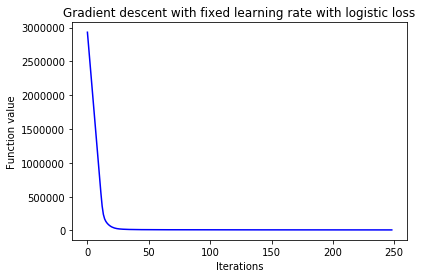

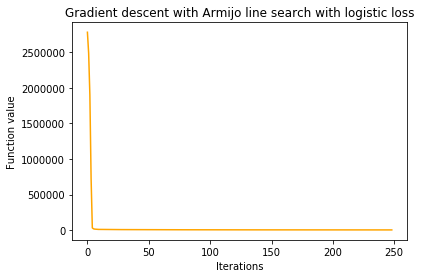

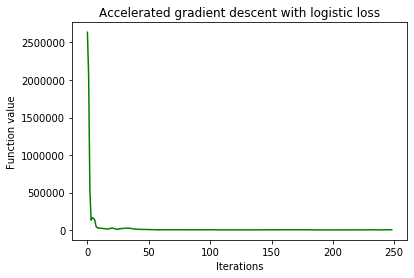

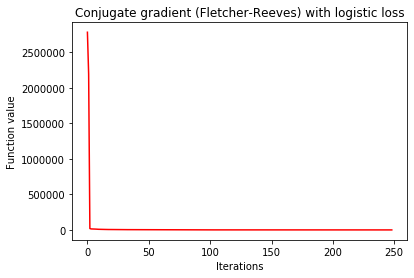

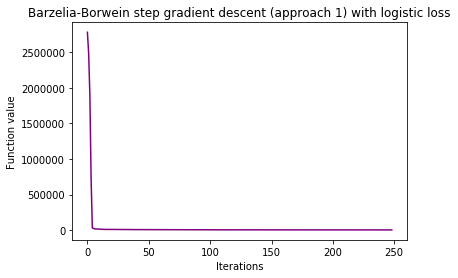

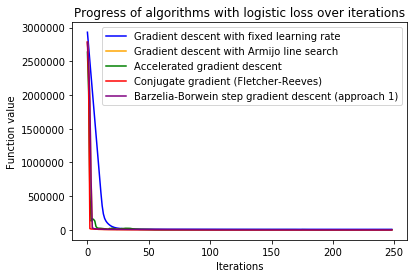

In [8]:
# Compare all gradient descent algorithms when using logistic loss

plt.title("Gradient descent with fixed learning rate with logistic loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd1_with_logistic_loss, label="Gradient descent with fixed learning rate", color='blue')
plt.show()

plt.title("Gradient descent with Armijo line search with logistic loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd2_with_logistic_loss, label="Gradient descent with Armijo line search", color='orange')
plt.show()

plt.title("Accelerated gradient descent with logistic loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd3_with_logistic_loss, label="Accelerated gradient descent", color='green')
plt.show()

plt.title("Conjugate gradient (Fletcher-Reeves) with logistic loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd4_with_logistic_loss, label="Conjugate gradient (Fletcher-Reeves)", color='red')
plt.show()

plt.title("Barzelia-Borwein step gradient descent (approach 1) with logistic loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd5_with_logistic_loss, label="Barzelia-Borwein step gradient descent (approach 1)", color='purple')
plt.show()

plt.title("Progress of algorithms with logistic loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd1_with_logistic_loss, label="Gradient descent with fixed learning rate", color='blue')
plt.plot(gd2_with_logistic_loss, label="Gradient descent with Armijo line search", color='orange')
plt.plot(gd3_with_logistic_loss, label="Accelerated gradient descent", color='green')
plt.plot(gd4_with_logistic_loss, label="Conjugate gradient (Fletcher-Reeves)", color='red')
plt.plot(gd5_with_logistic_loss, label="Barzelia-Borwein step gradient descent (approach 1)", color='purple')
plt.legend()
plt.show()

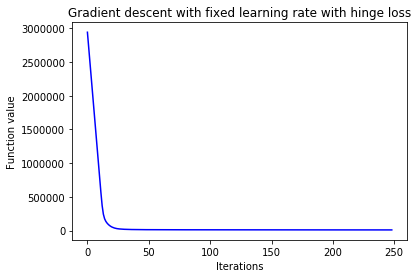

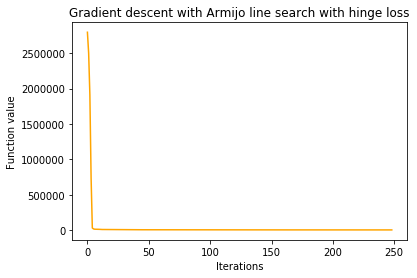

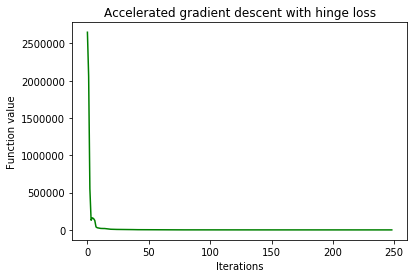

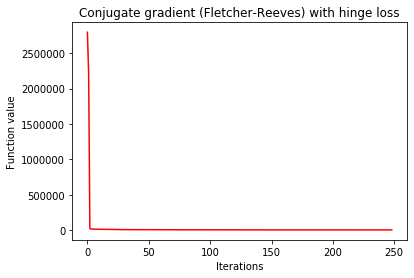

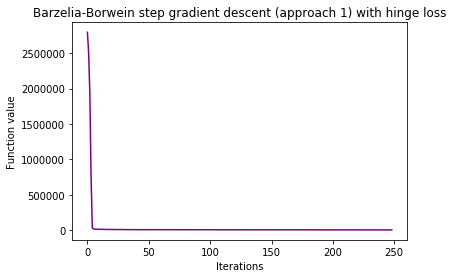

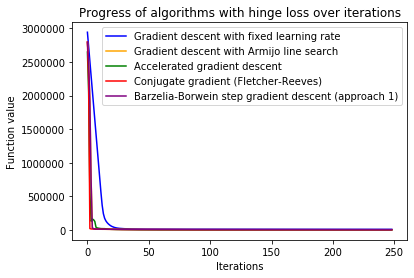

In [9]:
# Compare all gradient descent algorithms when using hinge loss

plt.title("Gradient descent with fixed learning rate with hinge loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd1_with_hinge_loss, label="Gradient descent with fixed learning rate", color='blue')
plt.show()

plt.title("Gradient descent with Armijo line search with hinge loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd2_with_hinge_loss, label="Gradient descent with Armijo line search", color='orange')
plt.show()

plt.title("Accelerated gradient descent with hinge loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd3_with_hinge_loss, label="Accelerated gradient descent", color='green')
plt.show()

plt.title("Conjugate gradient (Fletcher-Reeves) with hinge loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd4_with_hinge_loss, label="Conjugate gradient (Fletcher-Reeves)", color='red')
plt.show()

plt.title("Barzelia-Borwein step gradient descent (approach 1) with hinge loss")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd5_with_hinge_loss, label="Barzelia-Borwein step gradient descent (approach 1)", color='purple')
plt.show()

plt.title("Progress of algorithms with hinge loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Function value")
plt.plot(gd1_with_hinge_loss, label="Gradient descent with fixed learning rate", color='blue')
plt.plot(gd2_with_hinge_loss, label="Gradient descent with Armijo line search", color='orange')
plt.plot(gd3_with_hinge_loss, label="Accelerated gradient descent", color='green')
plt.plot(gd4_with_hinge_loss, label="Conjugate gradient (Fletcher-Reeves)", color='red')
plt.plot(gd5_with_hinge_loss, label="Barzelia-Borwein step gradient descent (approach 1)", color='purple')
plt.legend()
plt.show()